In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import DBSCAN
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [3]:
xtrain = pd.read_csv("X_train.csv")
xtrain = xtrain.iloc[:, 1:]
xtest = pd.read_csv("X_test.csv")
xtest = xtest.iloc[:, 1:]
ytrain = pd.read_csv("Y_train.csv")

In [6]:
xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x990,x991,x992,x993,x994,x995,x996,x997,x998,x999
0,-1.099144,0.918165,-1.227394,0.887061,1.182734,-0.371802,-0.127331,1.201702,1.825839,2.944655,...,-1.111422,1.566261,-1.656656,-0.412988,2.803183,-3.253815,-2.042599,3.497246,-1.275422,2.440708
1,0.366477,0.933802,0.061234,0.430073,1.029673,-0.613771,0.364698,1.140867,0.182811,-0.344876,...,-0.672386,-0.003721,-0.496326,0.672818,-0.546066,-0.227112,0.291441,-0.150495,0.156421,0.714252
2,-0.425879,-0.802152,0.002718,0.820036,1.490237,-0.888121,0.769524,1.059020,0.854806,-0.077359,...,-1.031358,-0.085724,-0.557461,-0.091904,-0.123858,0.387162,1.031941,0.766522,0.339105,-0.046364
3,0.822922,-0.843041,-0.734624,-0.000040,0.123783,-1.777226,0.364601,0.425521,1.265122,0.734897,...,-0.118974,1.271367,-1.518161,-0.315441,0.218074,-1.880067,-0.495170,1.418946,-0.201938,1.475484
4,-0.285342,-0.641116,0.436524,-0.618663,0.319982,-1.160489,0.528379,0.337300,-0.156210,-0.756133,...,-0.997750,-1.008573,-0.404263,0.304188,0.313034,-0.514287,0.701526,0.473238,-0.046099,0.492881


In [9]:
scaler = preprocessing.StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain_scaled, columns = xtrain.columns)
xtrain.head()

xtest_scaled = scaler.fit_transform(xtest)
xtest = pd.DataFrame(xtest_scaled, columns = xtest.columns)

In [10]:
xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x990,x991,x992,x993,x994,x995,x996,x997,x998,x999
0,-1.840518,1.597399,-1.566879,1.318517,1.224235,0.467476,-0.253576,1.039812,1.633978,4.418079,...,-0.425856,1.888679,-1.162395,-0.364536,3.890852,-2.427321,-2.940834,2.812110,-2.299139,2.525006
1,0.619592,1.623413,0.278043,0.514940,0.944443,0.104691,0.646045,0.923358,-0.443742,-0.067938,...,0.292802,-0.478049,0.175093,1.183367,-2.432090,0.437443,0.129552,-1.352405,0.354345,0.407577
2,-0.710412,-1.264568,0.194266,1.200658,1.786342,-0.306642,1.386228,0.766680,0.406042,0.296882,...,-0.294799,-0.601668,0.104624,0.093194,-1.635018,1.018851,1.103666,-0.305475,0.692894,-0.525287
3,1.385757,-1.332591,-0.861383,-0.241379,-0.711499,-1.639679,0.645869,-0.446010,0.924914,1.404576,...,1.198682,1.444130,-1.002754,-0.225475,-0.989495,-1.127073,-0.905220,0.439379,-0.309765,1.341197
4,-0.474514,-0.996663,0.815343,-1.329177,-0.352854,-0.715004,0.945319,-0.614891,-0.872456,-0.628779,...,-0.239786,-1.992851,0.281212,0.657856,-0.810223,0.165633,0.669012,-0.640308,-0.020964,0.136075


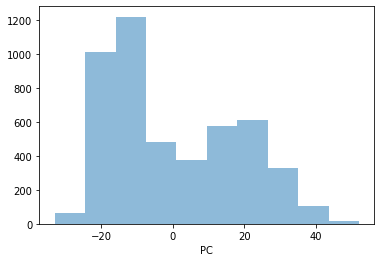

PC1 explains [0.32497892] of the variance


In [66]:
pca = PCA(n_components=1)
principal_components = pca.fit_transform(xtrain)
xpca = pd.DataFrame(data = principal_components, columns = ['PC1'])

plt.hist(xpca['PC1'], alpha=0.5, bins = 10)
plt.xlabel('PC')
plt.show()

print("PC1 explains", pca.explained_variance_ratio_, "of the variance")

In [68]:
pca = PCA(n_components=10)
principal_components = pca.fit_transform(xtrain)
print(pca.explained_variance_ratio_)

[0.32497892 0.03446801 0.02314768 0.01930899 0.01617568 0.01502261
 0.01386051 0.00957674 0.00797612 0.00732304]


In [25]:
pd.concat([xtrain, ytrain], axis = 1).drop('id', axis = 1)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x991,x992,x993,x994,x995,x996,x997,x998,x999,y
0,-1.840518,1.597399,-1.566879,1.318517,1.224235,0.467476,-0.253576,1.039812,1.633978,4.418079,...,1.888679,-1.162395,-0.364536,3.890852,-2.427321,-2.940834,2.812110,-2.299139,2.525006,1
1,0.619592,1.623413,0.278043,0.514940,0.944443,0.104691,0.646045,0.923358,-0.443742,-0.067938,...,-0.478049,0.175093,1.183367,-2.432090,0.437443,0.129552,-1.352405,0.354345,0.407577,0
2,-0.710412,-1.264568,0.194266,1.200658,1.786342,-0.306642,1.386228,0.766680,0.406042,0.296882,...,-0.601668,0.104624,0.093194,-1.635018,1.018851,1.103666,-0.305475,0.692894,-0.525287,1
3,1.385757,-1.332591,-0.861383,-0.241379,-0.711499,-1.639679,0.645869,-0.446010,0.924914,1.404576,...,1.444130,-1.002754,-0.225475,-0.989495,-1.127073,-0.905220,0.439379,-0.309765,1.341197,1
4,-0.474514,-0.996663,0.815343,-1.329177,-0.352854,-0.715004,0.945319,-0.614891,-0.872456,-0.628779,...,-1.992851,0.281212,0.657856,-0.810223,0.165633,0.669012,-0.640308,-0.020964,0.136075,1


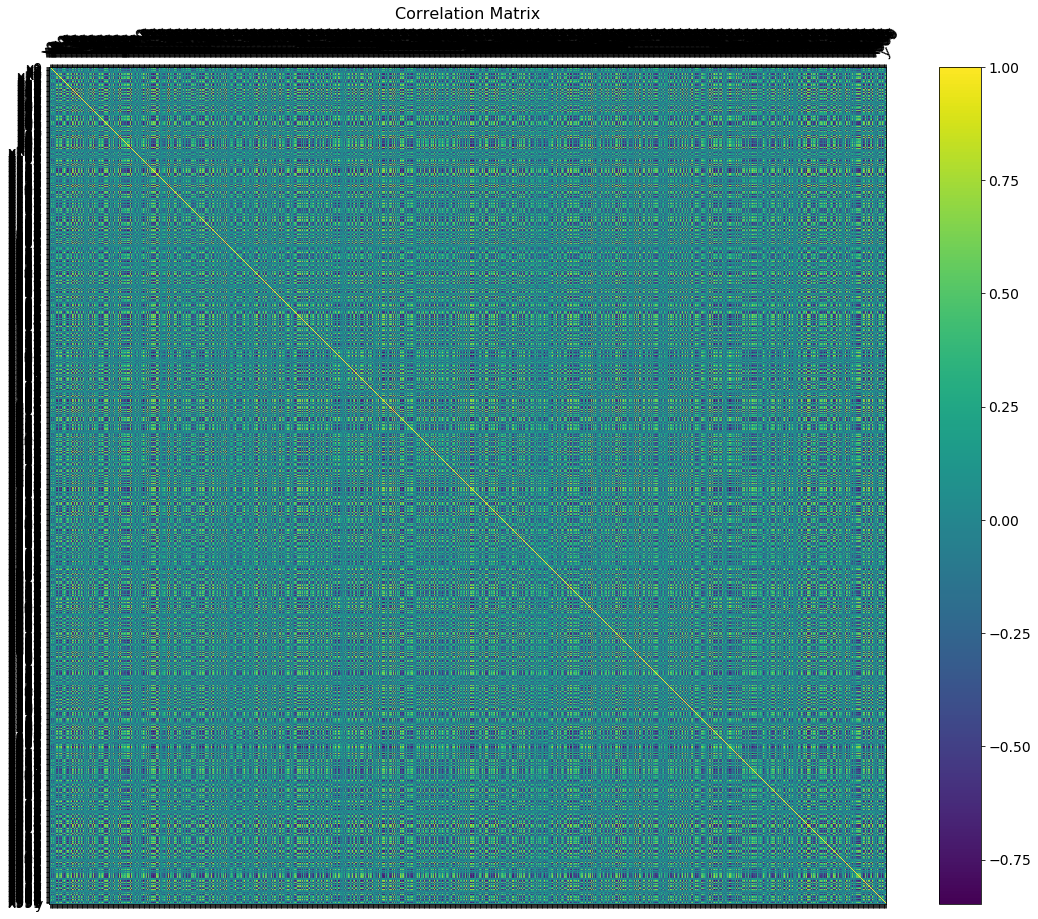

In [29]:
f = plt.figure(figsize=(19, 15))
plt.matshow(pd.concat([xtrain, ytrain], axis = 1).drop('id', axis = 1).corr(), fignum=f.number)
plt.xticks(range(pd.concat([xtrain, ytrain], axis = 1).drop('id', axis = 1).shape[1]), 
           pd.concat([xtrain, ytrain], axis = 1).drop('id', axis = 1).columns, fontsize=14, rotation=45)
plt.yticks(range(pd.concat([xtrain, ytrain], axis = 1).drop('id', axis = 1).shape[1]), 
           pd.concat([xtrain, ytrain], axis = 1).drop('id', axis = 1).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

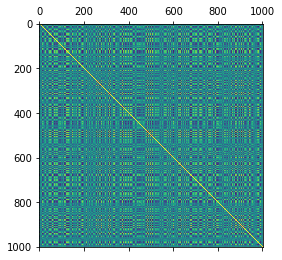

In [27]:
plt.matshow(pd.concat([xtrain, ytrain], axis = 1).drop('id', axis = 1).corr())
plt.show()

In [45]:
all_data_corr = pd.concat([xtrain, ytrain], axis = 1).drop('id', axis = 1).corr()
all_data_corr.head()
all_data_corr.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x991,x992,x993,x994,x995,x996,x997,x998,x999,y
x996,0.095847,0.158210,0.408657,0.029062,-0.007345,0.197681,-0.018979,0.124882,-0.287728,-0.394288,...,-0.315581,0.332517,0.273732,-0.029824,0.373205,1.000000,-0.378022,-0.005288,-0.246833,-0.020280
x997,-0.216558,-0.001093,-0.498402,0.134702,-0.051430,-0.395689,-0.030538,-0.174601,0.586678,0.403522,...,0.532317,-0.492241,-0.500826,0.178345,-0.665937,-0.378022,1.000000,0.101491,0.564739,-0.005412
x998,-0.012215,0.060518,-0.010318,0.061607,-0.026058,-0.096584,-0.049958,-0.053180,0.069518,-0.034340,...,0.113265,-0.049841,-0.083884,0.006605,-0.104523,-0.005288,0.101491,1.000000,0.026943,0.058749
x999,-0.315058,0.097244,-0.396207,0.196378,0.005400,-0.319812,-0.050769,-0.155569,0.555878,0.437966,...,0.439696,-0.557260,-0.452244,0.121378,-0.657381,-0.246833,0.564739,0.026943,1.000000,-0.053905
y,0.040342,-0.058671,-0.017157,-0.027290,-0.024140,0.004223,0.024773,0.001105,-0.036022,-0.077550,...,-0.017727,0.063415,0.001216,0.004062,0.049469,-0.020280,-0.005412,0.058749,-0.053905,1.000000


11

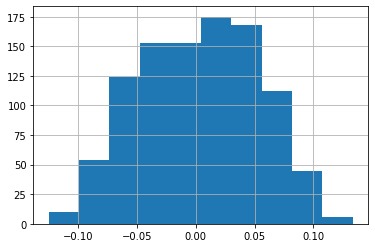

In [61]:
all_data_corr.loc[:'x999', "y"].hist(bins = 10)
np.count_nonzero(all_data_corr.loc[:'x999', "y"] >= 0.1)

In [56]:
np.count_nonzero(all_data_corr.values >= 0.3) / np.count_nonzero(all_data_corr.values)

0.19905269555619207

In [48]:
all_data_corr.loc[:'x999', "y"]

x0      0.040342
x1     -0.058671
x2     -0.017157
x3     -0.027290
x4     -0.024140
x5      0.004223
x6      0.024773
x7      0.001105
x8     -0.036022
x9     -0.077550
x10    -0.060470
x11     0.054104
x12     0.006195
x13    -0.004238
x14    -0.066981
x15    -0.083917
x16     0.004828
x17    -0.005271
x18     0.069467
x19     0.098677
x20    -0.057749
x21    -0.052702
x22    -0.004009
x23    -0.024693
x24     0.011827
x25    -0.011102
x26    -0.049731
x27     0.097451
x28     0.077349
x29     0.038943
          ...   
x970    0.058647
x971    0.051754
x972    0.061545
x973   -0.027371
x974    0.006343
x975    0.034486
x976    0.027543
x977    0.061127
x978    0.025138
x979    0.087256
x980    0.025041
x981    0.050849
x982   -0.049495
x983    0.068465
x984   -0.034787
x985    0.010530
x986    0.057311
x987   -0.063648
x988   -0.004700
x989   -0.075656
x990    0.051831
x991   -0.017727
x992    0.063415
x993    0.001216
x994    0.004062
x995    0.049469
x996   -0.020280
x997   -0.0054